In [1]:
import os, shutil

In [1]:
from glob import glob
data = glob('data/histo/**/*.png', recursive=True)


In [2]:
data[0]

'data/histo\\10253\\0\\10253_idx5_x1001_y1001_class0.png'

In [6]:
!pip install opencv-python

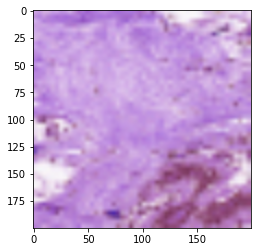

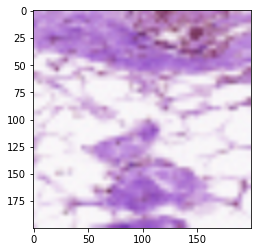

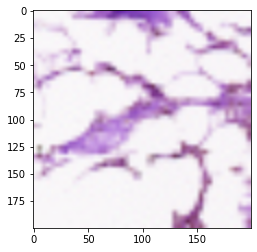

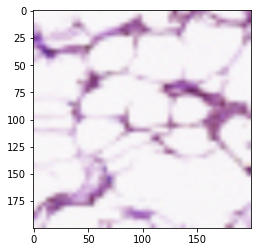

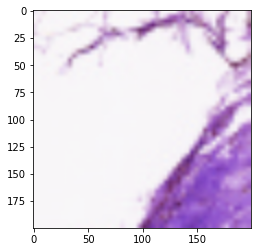

In [8]:
import cv2
import matplotlib.pyplot as plt
for i in data[:5]:
    img = cv2.imread(i)
    img_1 = cv2.resize(img,(200,200))
    plt.imshow(img_1,cmap='binary')
    plt.show()


In [9]:
images=[]
labels=[]
for i in data[:15000]:
    if i.endswith('.png'):
        label=i[-5]
        img=cv2.imread(i)
        img_1=cv2.resize(img,(100,100))
        images.append(img_1)
        labels.append(label)

In [16]:
import numpy as np
x = np.stack(images)

In [17]:
from tensorflow.keras.utils import to_categorical
y=to_categorical(labels)

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [19]:
# Normalizing the data
x=x/255

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)
# 3000 test sample
# 4800 validation sample
# 7200 train sample

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [32]:
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras import models, layers
def first_simple():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(100, 100, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(2, activation='sigmoid'))
    return model

def modelEfficientNetB0():
    
    model = models.Sequential()
    model.add(EfficientNetB0(include_top = False, weights = "imagenet",
                            input_shape=(100,100, 3)))
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dense(2, activation = "sigmoid"))
    
    return model 
model = first_simple()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 21, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 8, 8, 128)        

In [33]:
from keras.optimizers import Adam
opt = Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['acc'])

In [34]:
history = model.fit(x_train,y_train,
                    epochs=50,
                    steps_per_epoch=50,
                    validation_split=0.4,
                    batch_size=20,
                    validation_steps=20)

Epoch 1/50
50/50 [==============================] - 15s 299ms/step - loss: 0.6264 - acc: 0.8300 - val_loss: 0.5849 - val_acc: 0.7775
Epoch 2/50
50/50 [==============================] - 8s 159ms/step - loss: 0.5219 - acc: 0.7980 - val_loss: 0.5077 - val_acc: 0.7775
Epoch 3/50
50/50 [==============================] - 7s 142ms/step - loss: 0.4531 - acc: 0.8160 - val_loss: 0.5070 - val_acc: 0.7775
Epoch 4/50
50/50 [==============================] - 7s 140ms/step - loss: 0.4608 - acc: 0.8070 - val_loss: 0.5051 - val_acc: 0.7775
Epoch 5/50
50/50 [==============================] - 7s 142ms/step - loss: 0.4321 - acc: 0.8230 - val_loss: 0.5036 - val_acc: 0.7775
Epoch 6/50
50/50 [==============================] - 7s 144ms/step - loss: 0.4261 - acc: 0.8290 - val_loss: 0.5008 - val_acc: 0.7775
Epoch 7/50
50/50 [==============================] - 8s 152ms/step - loss: 0.4334 - acc: 0.8200 - val_loss: 0.4944 - val_acc: 0.7775
Epoch 8/50
50/50 [==============================] - 8s 150ms/step - loss: 0

In [35]:
# Test results of the Modle on train and test data
loss_train,accuracy_train = model.evaluate(x_train, y_train)
print('Model has an accuracy of {} with a loss of {} on the train subset.'.format(accuracy_train,loss_train ))
loss_test,accuracy_test = model.evaluate(x_test, y_test)
print('Model has an accuracy of {} with a loss of {} on the test subset.'.format(accuracy_test,loss_test))


MemoryError: Unable to allocate 1.34 GiB for an array with shape (12000, 100, 100, 3) and data type float32

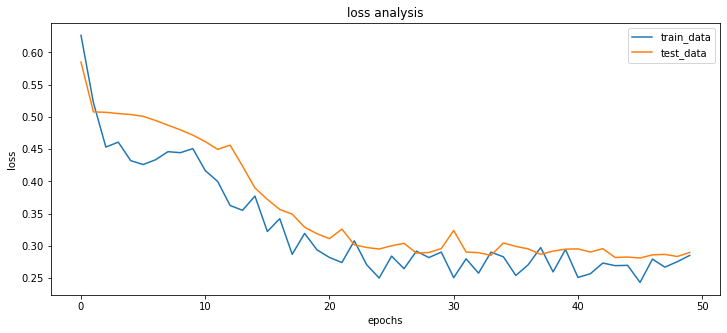

In [36]:
plt.figure(figsize=(12,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train_data','test_data'])
plt.title('loss analysis')
plt.show()

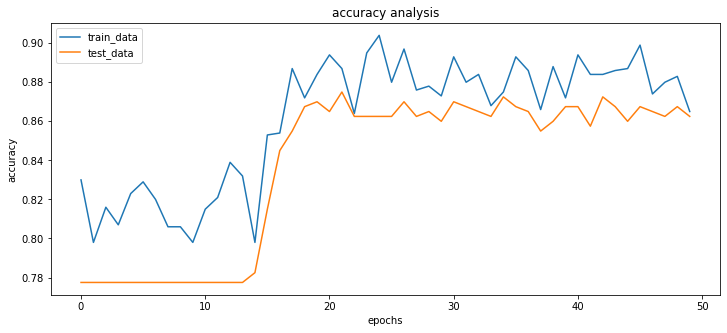

In [37]:
plt.figure(figsize=(12,5))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train_data','test_data'])
plt.title('accuracy analysis')
plt.show()